In [419]:
import re

import pandas as pd
import seaborn as sns

In [420]:
sns.set_theme()

## Основная часть

In [421]:
df: pd.DataFrame = pd.read_excel('data/Вариант 3.xlsx', header=2, skipfooter=1)  # noqa
df.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3,10,36
1,2,140,12,Ж,332,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4,14,36
2,3,137,11,М,328,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
3,4,148,11,М,333,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
4,5,153,11,Ж,333,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36


In [422]:
# описательная статистика
df['Балл'].describe()

count    1180.000000
mean       52.047458
std        14.965477
min        10.000000
25%        41.000000
50%        49.000000
75%        60.250000
max       100.000000
Name: Балл, dtype: float64

In [423]:
# % учащихся выполнивших работу ниже среднего
(df['Балл'] < df['Балл'].mean()).sum() / len(df) * 100  # noqa

56.271186440677965

In [424]:
# % учащихся не сдавших экзамен
(df['Балл'] < df['Минимальный балл']).sum() / len(df) * 100  # noqa

7.711864406779662

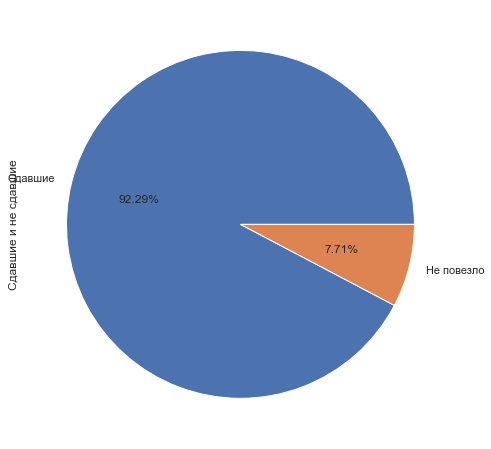

In [425]:
# круговая диаграмма сдавших и не сдавших
s: pd.Series = (df['Балл'] >= df['Минимальный балл']).value_counts().rename('Сдавшие и не сдавшие')  # noqa
s.index = s.index.map({False: 'Не повезло', True: 'Сдавшие'})
_ = s.plot.pie(figsize=(8, 8), autopct='%1.2f%%')

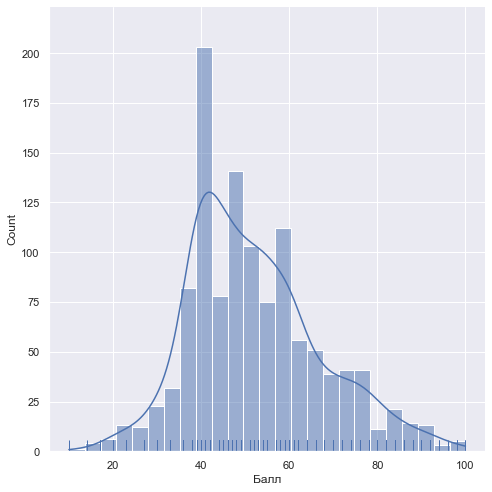

In [426]:
# ядерная оценка плотности распределения баллов за экзамен
_ = sns.displot(height=7, x=df['Балл'], kde=True, rug=True)

In [427]:
# % учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»
def exam_scale(s: pd.Series, left: int = 0, right: int = 100) -> float:
    return ((s >= left) & (s <= right)).sum() / len(s) * 100

In [428]:
score = df['Балл']
s = pd.Series({
    'неудовлетворительно': exam_scale(score, right=35),
    'удовлетворительно': exam_scale(score, left=36, right=52),
    'хорошо': exam_scale(score, left=53, right=67),
    'отлично': exam_scale(score, left=68),
}, name='ЕГЭ в оценках')
s

неудовлетворительно     7.711864
удовлетворительно      48.559322
хорошо                 27.796610
отлично                15.932203
Name: ЕГЭ в оценках, dtype: float64

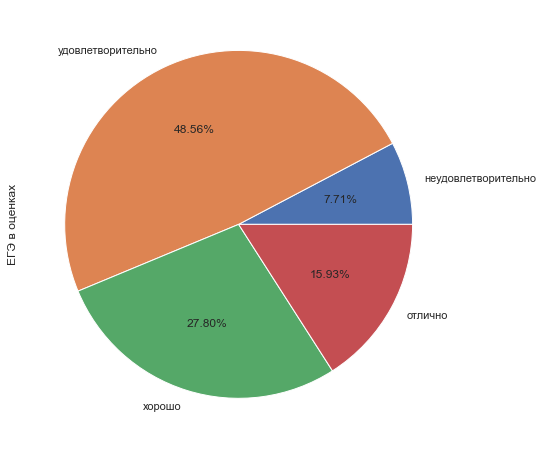

In [429]:
_ = s.plot.pie(figsize=(8, 8), autopct='%1.2f%%')

М    68.64
Ж    31.36
Name: Пол, dtype: float64


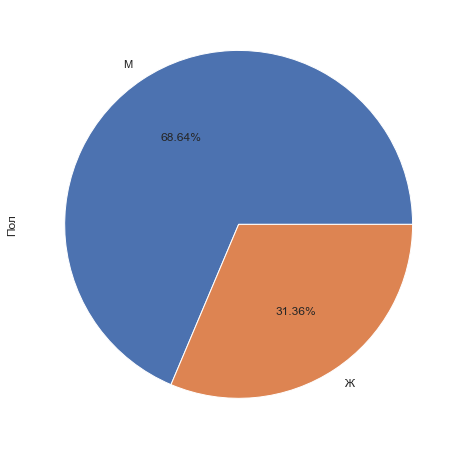

In [430]:
# % юношей и девушек писало данный экзамен
vc = df['Пол'].value_counts()
percent = vc / len(df) * 100
print(percent.round(2))
_ = vc.plot.pie(figsize=(8, 8), autopct='%1.2f%%')

In [431]:
# сколько школ принимало участие в экзамене
df['№ школы'].nunique()

19

## Дополнительно

In [432]:
# сколько всего заданий с кратким ответом? С развернутым ответом?
first_row = df.head(1)
pattern = re.compile(r'\d+\(\d+\)')

print(f'Заданий с кратким ответом: {first_row["Задания с кратким ответом"].str.len().item()}')
print(f'Заданий с развернутым ответом: {first_row["Задания с развёрнутым ответом"].str.count(pattern).item()}')

Заданий с кратким ответом: 27
Заданий с развернутым ответом: 5


In [433]:
# % выполненных и невыполненных заданий по каждому вопросу класса В
short_answers = df["Задания с кратким ответом"].str.replace('0', '-').str.split('', expand=True)
short_answers: pd.DataFrame = short_answers.drop(columns=[0, len(short_answers.columns) - 1])
short_answers.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
0,-,-,-,-,-,-,1,-,-,-,...,-,-,-,1,-,+,-,-,-,-
1,-,-,-,-,1,-,-,-,-,-,...,-,-,-,-,-,-,1,-,-,-
2,-,-,+,-,-,1,-,-,-,-,...,1,-,-,-,-,-,1,-,-,-
3,-,+,-,-,-,-,-,-,-,+,...,-,-,-,-,-,-,1,-,-,-
4,-,+,-,-,1,-,-,-,-,-,...,-,-,+,-,-,-,1,-,-,-


In [434]:
n_fails = short_answers.apply(lambda s: s.value_counts()['-']) / len(short_answers) * 100
pd.DataFrame({'fail': n_fails, 'success': 100 - n_fails})

,fail,success
1,14.661017,85.338983
2,13.135593,86.864407
3,37.796610,62.203390
4,55.508475,44.491525
5,17.033898,82.966102
6,17.118644,82.881356
7,19.067797,80.932203
8,34.406780,65.593220
9,26.016949,73.983051
10,65.000000,35.000000


In [435]:
# % выполненных и невыполненных заданий по каждому вопросу класса C
repl_pattern = re.compile(r'(\d+)\(\d+\)')
detailed_answers = pd.DataFrame(df['Задания с развёрнутым ответом'].apply(repl_pattern.findall).to_list())
detailed_answers.head()

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [436]:
n_fails = detailed_answers.apply(lambda s: s.value_counts()['0']) / len(detailed_answers) * 100
pd.DataFrame({'fail': n_fails, 'success': 100 - n_fails})

,fail,success
0,82.372881,17.627119
1,61.779661,38.220339
2,83.644068,16.355932
3,76.610169,23.389831
4,68.220339,31.779661


In [437]:
# анализ по двум школам
schools = df['№ школы'].value_counts().sort_values(ascending=False).head(2).index
sample_by_schools = df[df['№ школы'].isin(schools)].copy()
sample_by_schools

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3,10,36
3,4,148,11,М,333,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
18,19,148,11,Ж,328,----110---01---110--1--1---,0(3)0(3)0(3)0(3)0(3),NaN,7,23,36
19,20,152,11,М,330,+---010---01---100--1--2---,0(3)0(3)0(3)0(3)0(3),NaN,7,23,36
22,23,152,11В,М,332,-+--000---00---111+-0--2---,0(3)0(3)0(3)0(3)0(3),NaN,7,23,36
...,...,...,...,...,...,...,...,...,...,...,...
1174,1175,152,11,Ж,332,++++222+++22+++222++2++2+++,3(3)3(3)3(3)1(3)3(3),NaN,50,96,36
1175,1176,148,11,М,332,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51,98,36
1176,1177,148,11,М,330,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51,98,36
1177,1178,152,11,Ж,330,++++222+++22+++222++2++2+++,3(3)3(3)3(3)2(3)3(3),NaN,51,98,36


In [439]:
# по всем выполненным заданиям типа В
sample_by_schools['short_answers'] = (sample_by_schools['Задания с кратким ответом']
                                      .str.replace('0', '-')
                                      .str.count('-')) == 0
grouper = sample_by_schools.groupby('№ школы')['short_answers']
grouper_sum = grouper.sum()
short_answers_analysis = pd.DataFrame({
    'short_answers': grouper_sum,
    'short_answers (%)': grouper_sum / grouper.count() * 100
})
short_answers_analysis

,short_answers,short_answers (%)
№ школы,,
148,13,6.074766
152,8,4.705882


In [441]:
# по среднему балу юношей и девушек
sample_by_schools.groupby(['№ школы', 'Пол'])['Балл'].mean()

№ школы  Пол
148      Ж      56.432432
         М      57.064286
152      Ж      58.117647
         М      53.899160
Name: Балл, dtype: float64

In [443]:
repl_pattern = re.compile(r'(\d+)\(\d+\)')
detailed_answers = pd.DataFrame(df['Задания с развёрнутым ответом'].apply(repl_pattern.findall).to_list())
detailed_answers

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
1175,3,3,3,3,2
1176,3,3,3,3,2
1177,3,3,3,2,3
1178,3,3,3,3,3
